In [1]:
from DRAAF_pipeline.etl import ETLPipeline
from DRAAF_pipeline.graph_manager import GraphManager, GenericPlotter
from DRAAF_pipeline.metric_engine import MetricEngine

In [2]:
workspace_name = "msdq_conference_workspace"
data_sources = ["RESS-IoT-wrx=6,numSlots=100,alpha=0.125", "DQ-m=9", "MSDQ-m=21,distribution=exponential,alpha=0.3,t=21,k=1"]
node_counts = [10, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000]

In [3]:
data_source_to_protocol = {
    "DQ-m=9": "DQ",
    "MSDQ-m=21,distribution=exponential,alpha=0.3,t=21,k=1": "MSDQ",
    "RESS-IoT-wrx=6,numSlots=100,alpha=0.125": "RESS-IoT",
}

ETLPipeline(data_sources, data_source_to_protocol, node_counts, workspace_name).extract().transform().load()

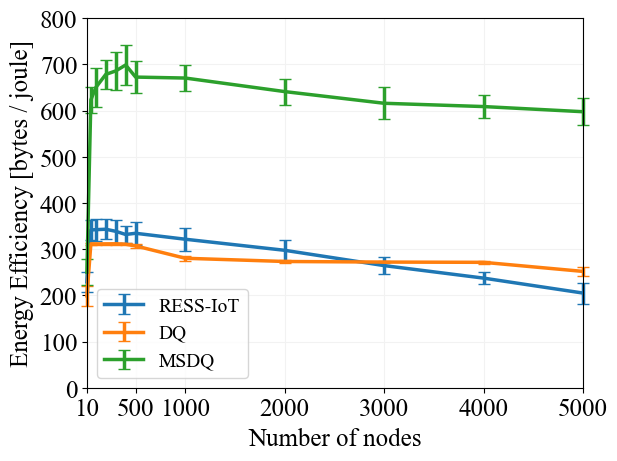

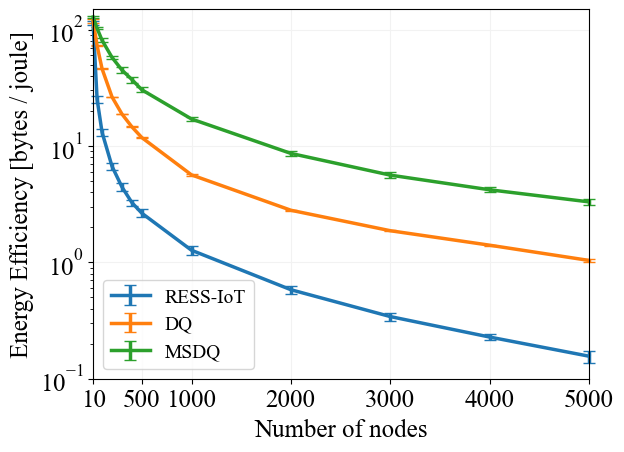

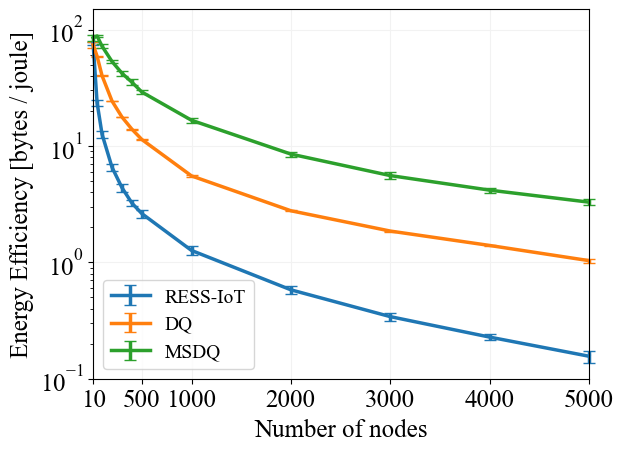

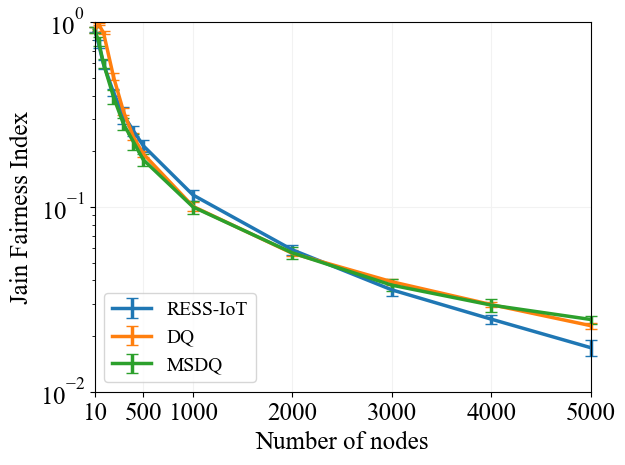

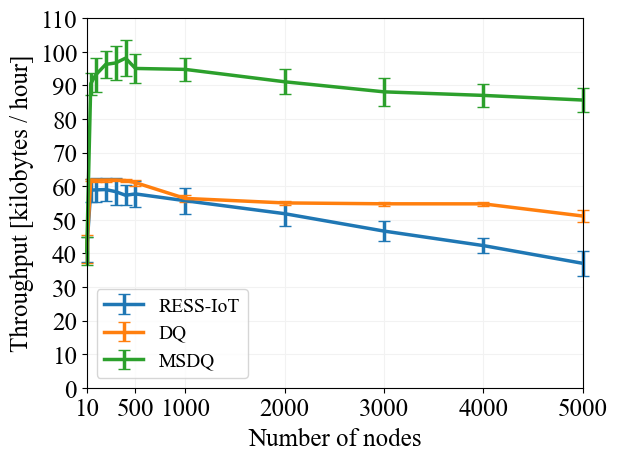

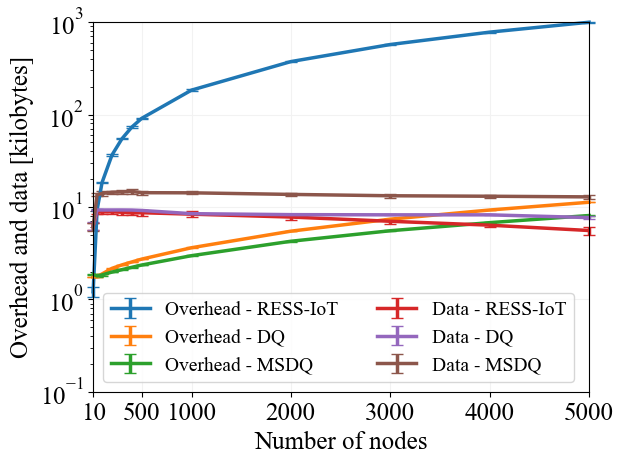

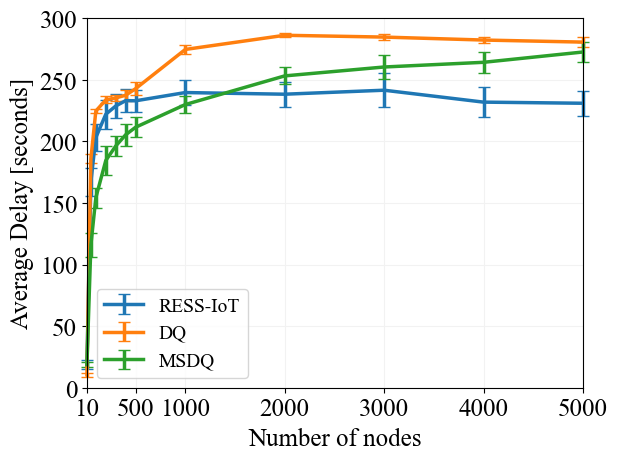

In [5]:
graph_manager = GraphManager(workspace_name)

generic_plotter = GenericPlotter(graph_manager, data_sources, node_counts)

generic_plotter.plot([MetricEngine.SATELLITE_ENERGY_EFFICIENCY], MetricEngine.SATELLITE_ENERGY_EFFICIENCY, [0, 800], False)

generic_plotter.plot([MetricEngine.AVG_NODE_ENERGY_EFFICIENCY], MetricEngine.AVG_NODE_ENERGY_EFFICIENCY, [0.1, 150], True)

generic_plotter.plot([MetricEngine.NETWORK_ENERGY_EFFICIENCY], MetricEngine.NETWORK_ENERGY_EFFICIENCY, [0.1, 150], True)

generic_plotter.plot([MetricEngine.JFI], MetricEngine.JFI, [0.01, 1], True)

generic_plotter.plot([MetricEngine.THROUGHPUT], MetricEngine.THROUGHPUT, [0, 110])

generic_plotter.plot([MetricEngine.OVERHEAD, MetricEngine.DATA], "Overhead and data [kilobytes]", [0.1, 1000], True, True)

generic_plotter.plot([MetricEngine.AVERAGE_DELAY], MetricEngine.AVERAGE_DELAY, [0, 300])